In [1]:
import sys
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
anova_hypot = pd.read_csv('Exp_1\\5_Stat\\all_subj_prop_as_hypot_anova.csv',header=0, sep =';')
anova_hypot
data_long = pd.melt(anova_hypot, id_vars=['subj'], 
                    value_vars=['iid diff as_lv', 'iid same as_lv', 'rdw diff as_lv', 'rdw same as_lv',
                                'iid diff as_ms', 'iid same as_ms', 'rdw diff as_ms', 'rdw same as_ms'],
                    var_name='Condition', value_name='Proportion')

# Extract additional information for plotting
data_long['Path Type'] = data_long['Condition'].apply(lambda x: 'IID' if 'iid' in x else 'RDW')
data_long['Condition Type'] = data_long['Condition'].apply(lambda x: 'Same' if 'same' in x else 'Opposite')
data_long['Response Type'] = data_long['Condition'].apply(lambda x: 'LV' if 'lv' in x else 'MS')



In [5]:
data_long =data_long.sort_values(['Condition Type',], ascending=[False],ignore_index=True)

In [6]:
data=data_long[data_long['Response Type']=='LV']

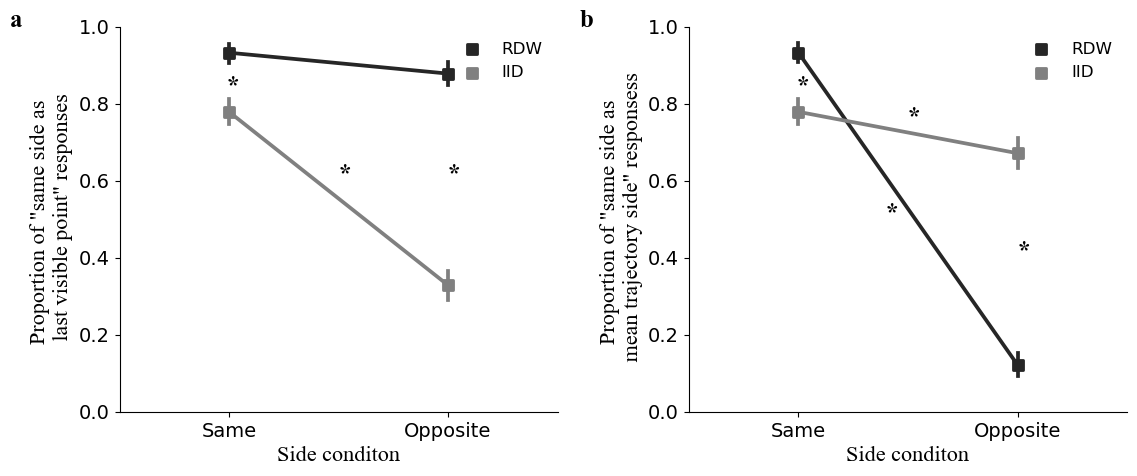

In [58]:
# Now, plot the data using seaborn's pointplot for easy comparison
plt.figure(figsize=(13, 11))
plt.subplots_adjust(wspace=0.3,)
plt.subplot(2, 2, 1)
sns.pointplot(data=data_long[data_long['Response Type']=='LV'], x='Condition Type', y='Proportion', hue='Path Type', markers=['s', 's'],fontname="Times New Roman",
              linestyles=["-", "-"],color=".5", errorbar= 'se')
plt.xlabel('Side conditon',fontname="Times New Roman", fontsize=16)
plt.ylabel('Proportion of "same side as \n last visible point" responses',fontname="Times New Roman", fontsize=16)
plt.legend(fontsize=12, loc='upper right',frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0,1)
plt.text(-1, 1, 'a',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(-0.01, 0.83, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.5, 0.6, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(1, 0.6, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.tick_params(axis='both', which='major', labelsize=14)


plt.subplot(2, 2, 2)
sns.pointplot(data=data_long[data_long['Response Type']=='MS'], x='Condition Type', y='Proportion', hue='Path Type', markers=['s', 's'], 
              linestyles=["-", "-"],color=".5", errorbar= 'se')
plt.xlabel('Side conditon',fontname="Times New Roman", fontsize=16)
plt.ylabel('Proportion of "same side as \n mean trajectory side" responsess',fontname="Times New Roman", fontsize=16)
plt.legend(fontsize=12, loc='upper right',frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(-1, 1, 'b',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(-0.01, 0.83, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.4, 0.5, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(1, 0.4, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.5, 0.75, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.ylim(0,1)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('behavior.png', dpi=300)

In [ ]:
### RT and ACC

In [8]:
rt_acc = pd.read_csv('Exp_1\\5_Stat\\all_subject_exp_1_ANOVA.csv',header=0, sep =';')

data_long_rt_acc = pd.melt(rt_acc, id_vars=['subj'], 
                    value_vars=['RT_s iid_diff', 'acc_lv iid_diff', 'RT_s iid_same', 'acc_lv iid_same',
                                'RT_s rdw_diff', 'acc_lv rdw_diff', 'RT_s rdw_same', 'acc_lv rdw_same'],
                    var_name='Condition', value_name='Responce')

# Extract additional information for plotting
data_long_rt_acc['Path Type'] = data_long_rt_acc ['Condition'].apply(lambda x: 'IID' if 'iid' in x else 'RDW')
data_long_rt_acc['Condition Type'] = data_long_rt_acc ['Condition'].apply(lambda x: 'Same' if 'same' in x else 'Opposite')
data_long_rt_acc['Response Type'] = data_long_rt_acc ['Condition'].apply(lambda x: 'RT_s' if 'RT_s' in x else 'acc')

In [9]:
data_long_rt_acc =data_long_rt_acc.sort_values(['Condition Type','Path Type'], ascending=[False,False],ignore_index=True)

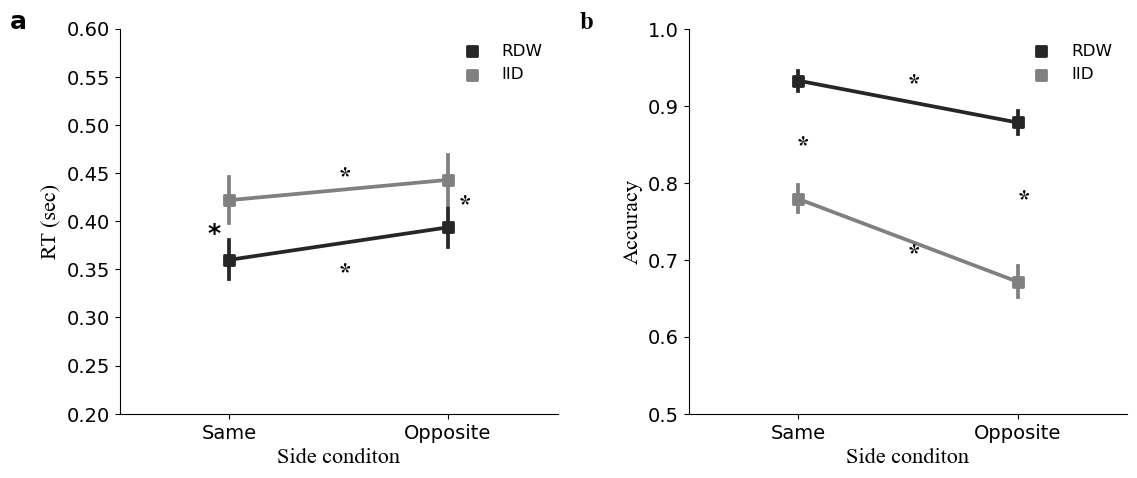

In [46]:
# Now, plot the data using seaborn's pointplot for easy comparison
plt.figure(figsize=(13, 11))
plt.subplots_adjust(wspace=0.3,)
plt.subplot(2, 2, 1)
sns.pointplot(data=data_long_rt_acc[data_long_rt_acc['Response Type']=='RT_s'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],
              linestyles=["-", "-"], color=".5",  errorbar="se")
plt.xlabel('Side conditon',fontname="Times New Roman", fontsize=16)
plt.ylabel('RT (sec)',fontname="Times New Roman", fontsize=16)
plt.legend(fontsize=12, loc='upper right',frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0.2,0.6)
plt.text(-1, 0.6, 'a',fontsize=18,weight='bold')
plt.text(-0.1, 0.38, '*',fontsize=18, weight='bold')
plt.text(0.5, 0.44, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.5, 0.34, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(1.05, 0.41, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.tick_params(axis='both', which='major', labelsize=14)


plt.subplot(2, 2, 2)
sns.pointplot(data=data_long_rt_acc[data_long_rt_acc['Response Type']=='acc'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],
              linestyles=["-", "-"],color=".5", errorbar= 'se')
plt.xlabel('Side conditon',fontname="Times New Roman", fontsize=16)
plt.ylabel('Accuracy',fontname="Times New Roman", fontsize=16)
plt.legend(fontsize=12, loc='upper right',frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(-1, 1, 'b',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(-0.01, 0.84, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.5, 0.92, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(1, 0.77, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.5, 0.7, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.ylim(0.5,1)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('acc_rt.png', dpi=300)

C:\Users\Oleg\AppData\Local\Temp\ipykernel_11580\3180184926.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(data=data_long_rt_acc[data_long_rt_acc['Response Type']=='RT_s'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],
C:\Users\Oleg\AppData\Local\Temp\ipykernel_11580\3180184926.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(data=data_long_rt_acc[data_long_rt_acc['Response Type']=='acc'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],


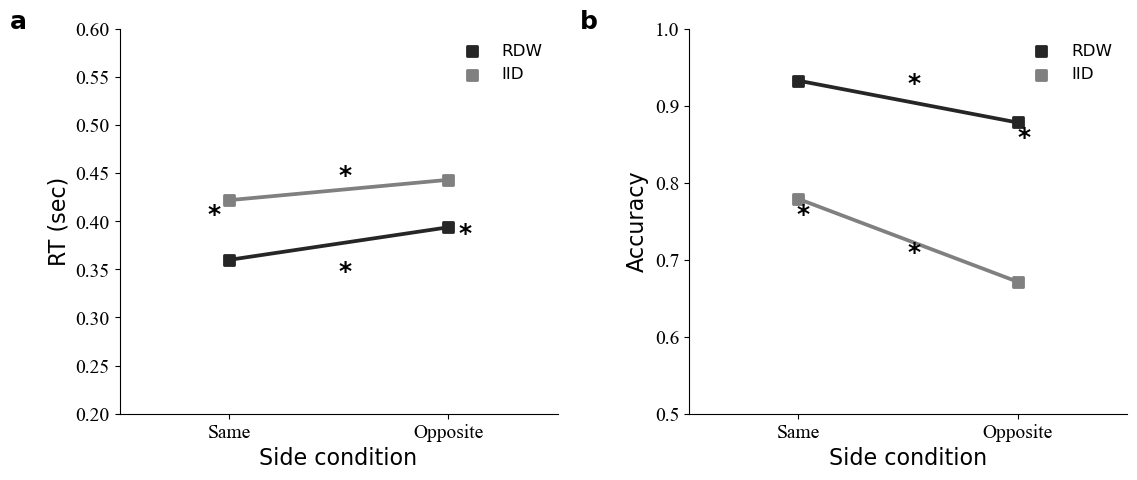

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 11))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2, 2, 1)
ax = sns.pointplot(data=data_long_rt_acc[data_long_rt_acc['Response Type']=='RT_s'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],
                   linestyles=["-", "-"], color=".5", ci=None)
plt.xlabel('Side condition', fontsize=16)
plt.ylabel('RT (sec)', fontsize=16)
plt.legend(fontsize=12, loc='upper right', frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0.2, 0.6)
plt.text(-1, 0.6, 'a', fontsize=18, weight='bold')
plt.text(-0.1, 0.4, '*', fontsize=18, weight='bold')
plt.text(0.5, 0.44, '*', fontsize=18, weight='bold')
plt.text(0.5, 0.34, '*', fontsize=18, weight='bold')
plt.text(1.05, 0.38, '*', fontsize=18, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=14)

# Set fontname for x and y labels
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')

plt.subplot(2, 2, 2)
ax = sns.pointplot(data=data_long_rt_acc[data_long_rt_acc['Response Type']=='acc'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],
                   linestyles=["-", "-"], color=".5", ci=None)
plt.xlabel('Side condition', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=12, loc='upper right', frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(-1, 1, 'b', fontsize=18, weight='bold')
plt.text(-0.01, 0.75, '*', fontsize=18, weight='bold')
plt.text(0.5, 0.92, '*', fontsize=18, weight='bold')
plt.text(1, 0.85, '*', fontsize=18, weight='bold')
plt.text(0.5, 0.7, '*', fontsize=18, weight='bold')
plt.ylim(0.5, 1)
plt.tick_params(axis='both', which='major', labelsize=14)

# Set fontname for x and y labels
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')

plt.show()


In [48]:
### DDM model
ddm = pd.read_csv('Exp_1\\4_DDM\\estimates_all zfix_ok.csv',header=0, sep =';')

data_long_ddm = pd.melt(ddm, id_vars=['dataset'], 
                    value_vars=['a_iid_diff', 't0_iid_diff', 'a_iid_same', 't0_iid_same',
                                'a_rdw_diff', 't0_rdw_diff', 'a_rdw_same', 't0_rdw_same','v_iid_diff','v_iid_same','v_rdw_diff','v_rdw_same'],
                    var_name='Condition', value_name='Responce')

# Extract additional information for plotting
data_long_ddm['Path Type'] = data_long_ddm ['Condition'].apply(lambda x: 'IID' if 'iid' in x else 'RDW')
data_long_ddm['Condition Type'] = data_long_ddm ['Condition'].apply(lambda x: 'Same' if 'same' in x else 'Opposite')
data_long_ddm['Response Type'] = data_long_ddm ['Condition'].apply(lambda x: 'a' if 'a_' in x else ('ter' if 't0_' in x else 'v'))

In [49]:
data_long_ddm

,dataset,Condition,Responce,Path Type,Condition Type,Response Type
0,0,a_iid_diff,0.987957,IID,Opposite,a
1,1,a_iid_diff,0.914393,IID,Opposite,a
2,2,a_iid_diff,0.923773,IID,Opposite,a
3,3,a_iid_diff,0.852111,IID,Opposite,a
4,4,a_iid_diff,0.902710,IID,Opposite,a
...,...,...,...,...,...,...
331,23,v_rdw_same,3.885991,RDW,Same,v
332,24,v_rdw_same,3.598626,RDW,Same,v
333,25,v_rdw_same,3.485186,RDW,Same,v
334,26,v_rdw_same,2.281419,RDW,Same,v


In [50]:
data_long_ddm =data_long_ddm.sort_values(['Condition Type','Path Type'], ascending=[False,False],ignore_index=True)
data_long_ddm

,dataset,Condition,Responce,Path Type,Condition Type,Response Type
0,0,a_rdw_same,0.965628,RDW,Same,a
1,1,a_rdw_same,1.146787,RDW,Same,a
2,2,a_rdw_same,1.493310,RDW,Same,a
3,3,a_rdw_same,1.434483,RDW,Same,a
4,4,a_rdw_same,3.133137,RDW,Same,a
...,...,...,...,...,...,...
331,23,v_iid_diff,2.649071,IID,Opposite,v
332,24,v_iid_diff,2.130588,IID,Opposite,v
333,25,v_iid_diff,-0.105049,IID,Opposite,v
334,26,v_iid_diff,0.338728,IID,Opposite,v


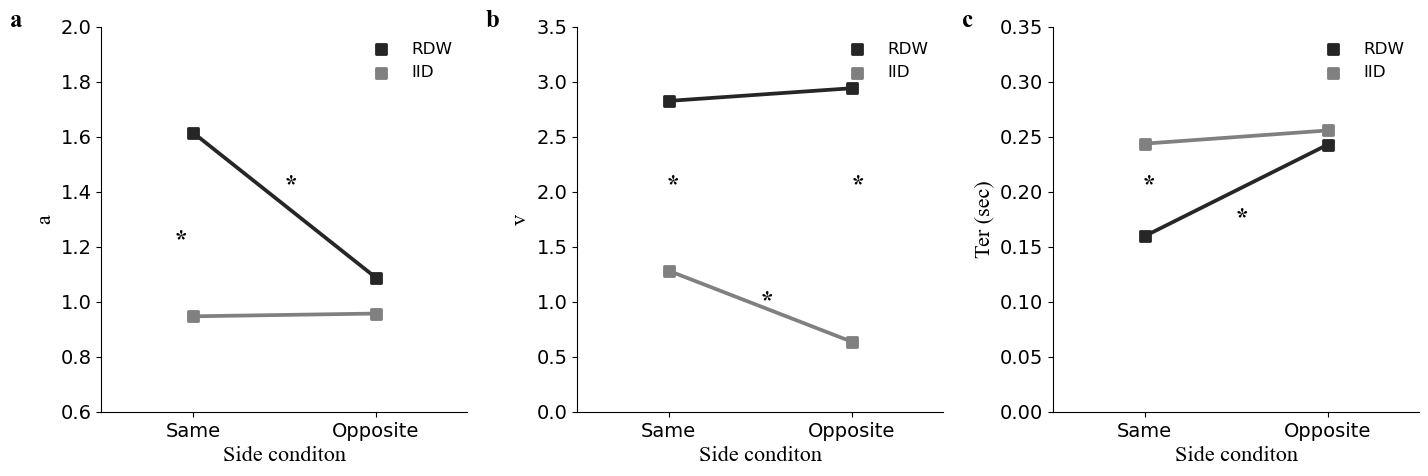

In [40]:
# Now, plot the data using seaborn's pointplot for easy comparison
plt.figure(figsize=(17, 11))
plt.subplots_adjust(wspace=0.3,)
plt.subplot(2, 3, 1)
sns.pointplot(data=data_long_ddm[data_long_ddm['Response Type']=='a'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],fontname="Times New Roman",
              linestyles=["-", "-"], color=".5",  ci=None)
plt.xlabel('Side conditon',fontname="Times New Roman", fontsize=16)
plt.ylabel('a',fontname="Times New Roman", fontsize=16)
plt.legend(fontsize=12, loc='upper right',frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0.6,2)
plt.text(-1, 2, 'a',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(-0.1, 1.2, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.5, 1.4, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.tick_params(axis='both', which='major', labelsize=14)


plt.subplot(2, 3, 2)
sns.pointplot(data=data_long_ddm[data_long_ddm['Response Type']=='v'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],fontname="Times New Roman",
              linestyles=["-", "-"],color=".5", ci=None)
plt.xlabel('Side conditon',fontname="Times New Roman", fontsize=16)
plt.ylabel('v',fontname="Times New Roman", fontsize=16)
plt.legend(fontsize=12, loc='upper right',frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(-1, 3.5, 'b',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(-0.01, 2, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(0.5, 0.95, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(1, 2, '*',fontsize=18, fontname="Times New Roman",weight='bold')

plt.ylim(0,3.5)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(2, 3, 3)
sns.pointplot(data=data_long_ddm[data_long_ddm['Response Type']=='ter'], x='Condition Type', y='Responce', hue='Path Type', markers=['s', 's'],fontname="Times New Roman",
              linestyles=["-", "-"],color=".5",ci=None )
plt.xlabel('Side conditon',fontname="Times New Roman", fontsize=16)
plt.ylabel('Ter (sec)',fontname="Times New Roman", fontsize=16)
plt.legend(fontsize=12, loc='upper right',frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.text(-1, 0.35, 'c',fontsize=18, fontname="Times New Roman",weight='bold')
plt.text(-0.01, 0.2, '*',fontsize=18, fontname="Times New Roman",weight='bold')

plt.text(0.5, 0.17, '*',fontsize=18, fontname="Times New Roman",weight='bold')
plt.ylim(0,0.35)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.savefig('ddm_param.png', dpi=300)